# Proves that $-\mu$ gives the same $T_c$ and order as $+\mu$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from criticalZoom import critical_zoom 
from timebudget import timebudget


In [15]:
# this code searches for the critical point for a given lambda1 and ml
@timebudget
def critical_point_refined(lambda1,ml,a0,tmin,tmax,numtemp,minsigma,maxsigma,mu0,delta_mu,mu_precision):
    mu=mu0
    #create a list to store the values of mu, Tc, and order
    mu_list=[]
    Tc_list=[]
    order_list=[]
    while round(delta_mu) >= mu_precision:
        print("current mu value is", mu)
        # see if the current mu value is in the list  mu_list
        if mu in mu_list:
            #find the index of the current mu value in the list
            index=mu_list.index(mu)
            #get the corresponding Tc and order values
            Tc=Tc_list[index]
            order=order_list[index]
            print("mu value already checked. Tc=",Tc,"order=",order)
        else:
            order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
            #add the current mu value to the list
            mu_list.append(mu)
            #add the corresponding Tc and order values to the lists
            Tc_list.append(Tc)
            order_list.append(order)
            

        if mu==mu0 and order==1:
            print("~~~~ No critical point in this range. Transition is always first-order when $\mu$ >.", mu0)
            break
        if order==1:
            mu=mu-delta_mu+delta_mu/2
            delta_mu=delta_mu/2
        else:
            mu=mu+delta_mu
    #find the maximum of the first element of sigma_list
    actual_max_sigma=np.amax(sigma_list[0][:,0])
            
    return(mu,Tc,actual_max_sigma)



### Finding critical point for a given value of $\lambda_1$

In [16]:
ml=24
lambda1=7.893
a0=0
minsigma=0
maxsigma=400
tmin=120
tmax=160
numtemp=25

mu=-300
delta_mu=128
precision=4

mu,Tc,sigma_peak=critical_point_refined(lambda1,ml,a0,tmin,tmax,numtemp,minsigma,maxsigma,mu,delta_mu,precision)

print("critical point found at Tc=",Tc," and mu=",mu)

current mu value is -300


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.593sec
Crossover or 2nd order
Pseudo-Critical temperature is between 133.33333333333334 140.0
Iteration number  1
get_all_sigmas_parallel took 3.572sec
Crossover or 2nd order
Pseudo-Critical temperature is between 137.22222222222223 138.33333333333334
Iteration number  2
get_all_sigmas_parallel took 3.078sec
First order
Critical temperature is  138.00925925925927
Iteration number  3
~~~~ No critical point in this range. Transition is always first-order when $\mu$ >. -300
critical_point_refined took 11.606sec
critical point found at Tc= 138.00925925925927  and mu= -300


In [11]:
mu

26.0

In [17]:
ml=24
a0=0
minsigma=0
maxsigma=400
tmin=120
tmax=160
lambda1=7.892
numtemp=25
# create an array of mu values from mu_min to mu_max
mu_min=-300
mu_max=300
num_mu=10
mu_array=np.linspace(mu_min,mu_max,num_mu)
# create an array to store the Tc values
Tc_array=np.zeros(num_mu)
# create an array to store the order
order_array=np.zeros(num_mu)

#Loop over the mu values and find the critical point for each one
for i in range(0,num_mu):
    mu=mu_array[i]
    print("current mu value is", mu)
    order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
    Tc_array[i]=Tc
    order_array[i]=order




/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.648sec
Crossover or 2nd order
Pseudo-Critical temperature is between 133.33333333333334 140.0
Iteration number  1
get_all_sigmas_parallel took 3.507sec
Crossover or 2nd order
Pseudo-Critical temperature is between 137.22222222222223 138.33333333333334
Iteration number  2
get_all_sigmas_parallel took 3.072sec
First order
Critical temperature is  137.96296296296296
Iteration number  3


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.762sec
Crossover or 2nd order
Pseudo-Critical temperature is between 141.66666666666666 148.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.703sec
First order
Critical temperature is  145.27777777777777
Iteration number  2


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.844sec
Crossover or 2nd order
Pseudo-Critical temperature is between 146.66666666666666 153.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.610sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.27777777777777 151.38888888888889
Iteration number  2
get_all_sigmas_parallel took 75.244sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.92592592592592 151.11111111111111
Iteration number  3
get_all_sigmas_parallel took 2.130sec
First order
Critical temperature is  151.02623456790124
Iteration number  4


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.969sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.560sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.44444444444446 155.55555555555554
Iteration number  2
get_all_sigmas_parallel took 3.005sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.90740740740742 155.09259259259258
Iteration number  3
get_all_sigmas_parallel took 2.204sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.9922839506173 155.02314814814815
Iteration number  4
get_all_sigmas_parallel took 1.860sec
First order
Critical temperature is  155.01028806584364
Iteration number  5


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.888sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.622sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.38888888888889 157.5
Iteration number  2
get_all_sigmas_parallel took 3.065sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.94444444444446 157.12962962962962
Iteration number  3
get_all_sigmas_parallel took 2.179sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.02932098765433 157.0601851851852
Iteration number  4
get_all_sigmas_parallel took 2.002sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.0408950617284 157.0460390946502
Iteration number  5
get_all_sigmas_parallel took 1.677sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.04325274348423 157.04411008230454
Iteration number  6
get_all_sigmas_parallel took 1.737sec
Crossover or 2nd order
Pseudo-Critical temp

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 77.471sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.699sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.38888888888889 157.5
Iteration number  2
get_all_sigmas_parallel took 3.139sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.94444444444446 157.12962962962962
Iteration number  3
get_all_sigmas_parallel took 2.085sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.02932098765433 157.0601851851852
Iteration number  4
get_all_sigmas_parallel took 1.765sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.0408950617284 157.0460390946502
Iteration number  5
get_all_sigmas_parallel took 1.639sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.04325274348423 157.04411008230454
Iteration number  6
get_all_sigmas_parallel took 1.628sec
Crossover or 2nd order
Pseudo-Critical tem

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 5.035sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.628sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.44444444444446 155.55555555555554
Iteration number  2
get_all_sigmas_parallel took 3.036sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.90740740740742 155.09259259259258
Iteration number  3
get_all_sigmas_parallel took 2.193sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.9922839506173 155.02314814814815
Iteration number  4
get_all_sigmas_parallel took 1.820sec
First order
Critical temperature is  155.01028806584364
Iteration number  5


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/DilatonMixingParallel/criticalZoom.py:162: RuntimeWarning: overflow encountered in square
  test = ((-u**2*fp)/f)*chiFields[:,1]-1/f*(3*chiFields[:,0]+lambda1*phi*chiFields[:,0]-3*v3*chiFields[:,0]**2-4*v4*chiFields[:,0]**3)
/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/DilatonMixingParallel/criticalZoom.py:162: RuntimeWarning: overflow encountered in power
  test = ((-u**2*fp)/f)*chiFields[:,1]-1/f*(3*chiFields[:,0]+lambda1*phi*chiFields[:,0]-3*v3*chiFields[:,0]**2-4*v4*chiFields[:,0]**3)
/Users/seanbartz/Dropbox/ISU/Research/QGP/DilatonMixing/DilatonMixingParallel/criticalZoom.py:162: RuntimeWarning: invalid value encountered in subtract
  test = ((-u**2*fp)/f)*chiFields[:,1]-1/f*(3*chiFields[:,0]+lambda1*phi*chiFields[:,0]-3*v3*chiFields[:,0]**2-4*v4*chiFields[:,0]**3)


get_all_sigmas_parallel took 4.991sec
Crossover or 2nd order
Pseudo-Critical temperature is between 146.66666666666666 153.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.564sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.27777777777777 151.38888888888889
Iteration number  2
get_all_sigmas_parallel took 3.042sec
Crossover or 2nd order
Pseudo-Critical temperature is between 150.92592592592592 151.11111111111111
Iteration number  3
get_all_sigmas_parallel took 2.144sec
First order
Critical temperature is  151.02623456790124
Iteration number  4


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 77.399sec
Crossover or 2nd order
Pseudo-Critical temperature is between 141.66666666666666 148.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.593sec
First order
Critical temperature is  145.27777777777777
Iteration number  2


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.647sec
Crossover or 2nd order
Pseudo-Critical temperature is between 133.33333333333334 140.0
Iteration number  1
get_all_sigmas_parallel took 3.455sec
Crossover or 2nd order
Pseudo-Critical temperature is between 137.22222222222223 138.33333333333334
Iteration number  2
get_all_sigmas_parallel took 3.153sec
First order
Critical temperature is  137.96296296296296
Iteration number  3


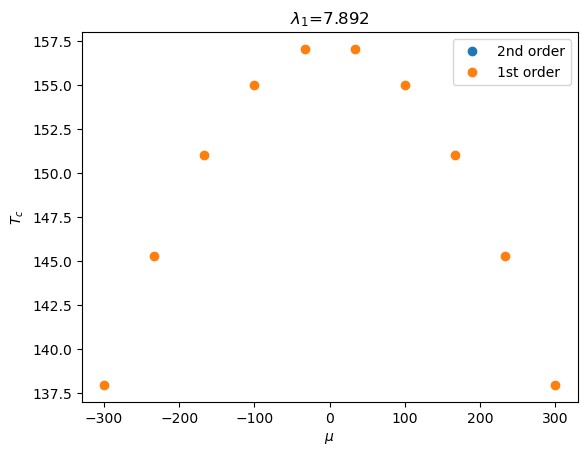

In [19]:
# create an array of mu values where the order is 2
mu_array_2nd_order=mu_array[order_array==2]
# create an array of Tc values where the order is 2
Tc_array_2nd_order=Tc_array[order_array==2]
#create an array of mu values where the order is 1
mu_array_1st_order=mu_array[order_array==1]
# create an array of Tc values where the order is 1
Tc_array_1st_order=Tc_array[order_array==1]

#plot the Tc vs mu
plt.plot(mu_array_2nd_order,Tc_array_2nd_order,'o',label='2nd order')
plt.plot(mu_array_1st_order,Tc_array_1st_order,'o',label='1st order')
plt.xlabel('$\mu$')
plt.ylabel('$T_c$')
plt.title('$\lambda_1$='+str(lambda1))
plt.legend()
plt.show()


In [20]:
ml=24
a0=0
minsigma=0
maxsigma=400
tmin=120
tmax=160
lambda1=7.89
numtemp=25
# create an array of mu values from mu_min to mu_max
mu_min=-100
mu_max=100
num_mu=9
mu_array=np.linspace(mu_min,mu_max,num_mu)
# create an array to store the Tc values
Tc_array=np.zeros(num_mu)
# create an array to store the order
order_array=np.zeros(num_mu)

#Loop over the mu values and find the critical point for each one
for i in range(0,num_mu):
    mu=mu_array[i]
    print("current mu value is", mu)
    order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
    Tc_array[i]=Tc
    order_array[i]=order

current mu value is -100.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.952sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.547sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.44444444444446 155.55555555555554
Iteration number  2
get_all_sigmas_parallel took 3.202sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.86111111111111 155.0462962962963
Iteration number  3
get_all_sigmas_parallel took 2.231sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.96141975308643 154.9922839506173
Iteration number  4
get_all_sigmas_parallel took 1.820sec
First order
Critical temperature is  154.97942386831278
Iteration number  5
current mu value is -75.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.904sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.584sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.27777777777777 156.38888888888889
Iteration number  2
get_all_sigmas_parallel took 3.190sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.87962962962962 156.0648148148148
Iteration number  3
get_all_sigmas_parallel took 2.109sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.95679012345678 155.98765432098764
Iteration number  4
get_all_sigmas_parallel took 1.987sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.97479423868313 155.97993827160494
Iteration number  5
get_all_sigmas_parallel took 1.731sec
First order
Critical temperature is  155.97715192043896
Iteration number  6
current mu value is -50.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 5.008sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.605sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.11111111111111 157.22222222222223
Iteration number  2
get_all_sigmas_parallel took 3.036sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.57407407407408 156.75925925925927
Iteration number  3
get_all_sigmas_parallel took 104.518sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.6743827160494 156.70524691358025
Iteration number  4
get_all_sigmas_parallel took 1.881sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.69110082304528 156.69624485596708
Iteration number  5
get_all_sigmas_parallel took 1.696sec
First order
Critical temperature is  156.69388717421126
Iteration number  6
current mu value is -25.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.885sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.557sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.38888888888889 157.5
Iteration number  2
get_all_sigmas_parallel took 3.095sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.03703703703704 157.22222222222223
Iteration number  3
get_all_sigmas_parallel took 2.141sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.1064814814815 157.13734567901236
Iteration number  4
get_all_sigmas_parallel took 1.835sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.12319958847738 157.12834362139918
Iteration number  5
get_all_sigmas_parallel took 1.672sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.12534293552812 157.12620027434843
Iteration number  6
get_all_sigmas_parallel took 1.518sec
Crossover or 2nd order
Pseudo-Critical te

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 5.019sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 3.805sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.66666666666669 157.77777777777777
Iteration number  2
get_all_sigmas_parallel took 3.009sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.17592592592592 157.36111111111111
Iteration number  3
get_all_sigmas_parallel took 2.288sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.2530864197531 157.28395061728395
Iteration number  4
get_all_sigmas_parallel took 1.871sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.26723251028807 157.27237654320987
Iteration number  5
get_all_sigmas_parallel took 1.700sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.2695901920439 157.2704475308642
Iteration number  6
get_all_sigmas_parallel took 1.642sec
Crossover or 2nd order
Pseudo-

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 9.506sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 5.994sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.38888888888889 157.5
Iteration number  2
get_all_sigmas_parallel took 5.091sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.03703703703704 157.22222222222223
Iteration number  3
get_all_sigmas_parallel took 3.215sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.1064814814815 157.13734567901236
Iteration number  4
get_all_sigmas_parallel took 2.837sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.12319958847738 157.12834362139918
Iteration number  5
get_all_sigmas_parallel took 2.750sec
Crossover or 2nd order
Pseudo-Critical temperature is between 157.12534293552812 157.12620027434843
Iteration number  6
get_all_sigmas_parallel took 2.920sec
Crossover or 2nd order
Pseudo-Critical te

/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 8.670sec
Crossover or 2nd order
Pseudo-Critical temperature is between 153.33333333333334 160.0
Iteration number  1
get_all_sigmas_parallel took 4.016sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.11111111111111 157.22222222222223
Iteration number  2
get_all_sigmas_parallel took 6.131sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.57407407407408 156.75925925925927
Iteration number  3
get_all_sigmas_parallel took 9.221sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.6743827160494 156.70524691358025
Iteration number  4
get_all_sigmas_parallel took 6.795sec
Crossover or 2nd order
Pseudo-Critical temperature is between 156.69110082304528 156.69624485596708
Iteration number  5
get_all_sigmas_parallel took 6.178sec
First order
Critical temperature is  156.69388717421126
Iteration number  6
current mu value is 75.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 24.740sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 4.789sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.27777777777777 156.38888888888889
Iteration number  2
get_all_sigmas_parallel took 130.518sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.87962962962962 156.0648148148148
Iteration number  3
get_all_sigmas_parallel took 2.192sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.95679012345678 155.98765432098764
Iteration number  4
get_all_sigmas_parallel took 1.786sec
Crossover or 2nd order
Pseudo-Critical temperature is between 155.97479423868313 155.97993827160494
Iteration number  5
get_all_sigmas_parallel took 1.799sec
First order
Critical temperature is  155.97715192043896
Iteration number  6
current mu value is 100.0


/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/seanbartz/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 t

get_all_sigmas_parallel took 4.974sec
Crossover or 2nd order
Pseudo-Critical temperature is between 151.66666666666666 158.33333333333334
Iteration number  1
get_all_sigmas_parallel took 3.555sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.44444444444446 155.55555555555554
Iteration number  2
get_all_sigmas_parallel took 3.006sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.86111111111111 155.0462962962963
Iteration number  3
get_all_sigmas_parallel took 2.303sec
Crossover or 2nd order
Pseudo-Critical temperature is between 154.96141975308643 154.9922839506173
Iteration number  4
get_all_sigmas_parallel took 2.380sec
First order
Critical temperature is  154.97942386831278
Iteration number  5


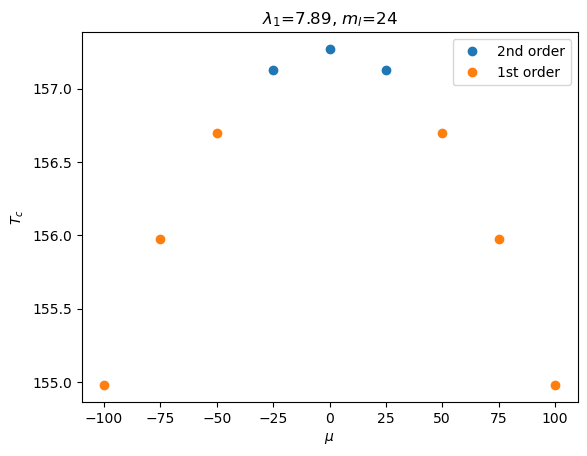

In [23]:
# create an array of mu values where the order is 2
mu_array_2nd_order=mu_array[order_array==2]
# create an array of Tc values where the order is 2
Tc_array_2nd_order=Tc_array[order_array==2]
#create an array of mu values where the order is 1
mu_array_1st_order=mu_array[order_array==1]
# create an array of Tc values where the order is 1
Tc_array_1st_order=Tc_array[order_array==1]

#plot the Tc vs mu
plt.plot(mu_array_2nd_order,Tc_array_2nd_order,'o',label='2nd order')
plt.plot(mu_array_1st_order,Tc_array_1st_order,'o',label='1st order')
plt.xlabel('$\mu$')
plt.ylabel('$T_c$')
plt.title('$\lambda_1$='+str(lambda1)+', $m_l$='+str(ml))
plt.legend()
plt.show()


In [22]:
Tc_array

array([154.97942387, 155.97715192, 156.69388717, 157.12566642,
       157.27004962, 157.12566642, 156.69388717, 155.97715192,
       154.97942387])